# RDKit Cookbook
## Introduction

The goal of this notebook is to learn more about RDKit functionality using Python. The information and examples below have has been taken from the [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html).

### Model Imports

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

IPythonConsole.ipython_useSVG=True # set this to False if you want to use PNGs instead of SVGs

### Drawing Molecules
**Drawing a molecule with atom index numbers**

Atom index numbers in chemistry represent the unique identifiers assigned to each atom within a molecule. These indices allow for the precise referencing of specific atoms, enabling detailed molecular operations and analyses, such as substructure matching or atom-specific modifications.

For example, when drawing or manipulating a molecule, you might want to highlight certain atoms or perform calculations based on these indices. This in particularly useful in cheminformatics libraries such as this one, which uses indices to manage and visualize molecular structures.

Atom index numbers in RDKit are determined based on the order in which the atoms are defined in the molecule's internal representation. When a molecule is created from a SMILES string (or another input format), each atom is assigned a unique index starting from 0. For instance, in the SMILES string `C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65`, the first carbon atom will have an index of 0, the second atom will have an index of 1, and so on. These indices can then be used programmatically to manipulate and analyze the molecule.

In [4]:
def mol_with_atom_index(molecule):
    for atom in molecule.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return molecule

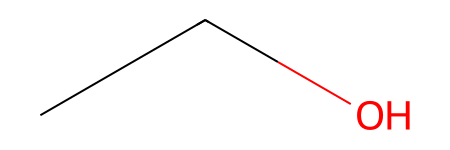

In [15]:
# test case in a kinase inhibitor
molecule = Chem.MolFromSmiles('CCO')

# molecule without atom index
molecule

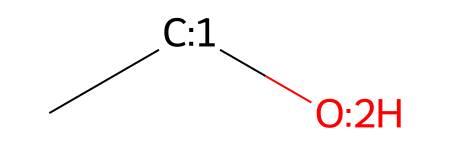

In [16]:
# with atom index
mol = mol_with_atom_index(molecule)
mol

As you can see above, the atom index 0 is not shown. 

A simpler way to add atom indices is to adjust the IPythonConsole properties. This produces a similar image to the exmaple above, excpet now the atom indices are near the atom rahter than at the atom position.

In [17]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300, 300

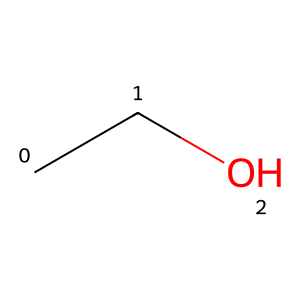

In [18]:
molecule = Chem.MolFromSmiles('CCO')
molecule

### Include a Calculation
**Draw a molecule with a calculation value displayed (e.g., Gasteiger Charge)**

In [28]:
from rdkit.Chem import AllChem
IPythonConsole.drawOptions.addAtomIndices = False # set back to False
IPythonConsole.molSize = 250, 250

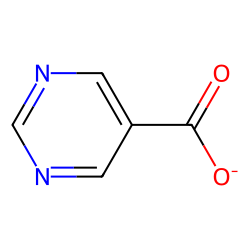

In [29]:
molecule = Chem.MolFromSmiles('c1ncncc1C(=O)[O-]')

# calculate Gasteiger Charges for the molecule
AllChem.ComputeGasteigerCharges(molecule)

# view default molecule with indices
molecule

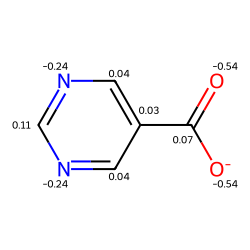

In [30]:
for atom in molecule.GetAtoms():
    label = '%.2f' % (atom.GetDoubleProp('_GasteigerCharge'))
    atom.SetProp('atomNote', label)

molecule

### Include Sterero Annotations
**Draw a molecule with stereochemistry annotations displayed**

In [31]:
IPythonConsole.drawOptions.addStereoAnnotation = True

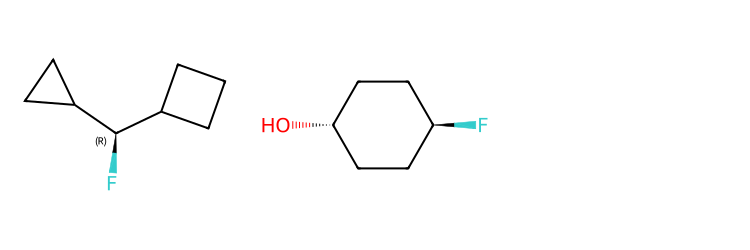

In [34]:
molecule1 = Chem.MolFromSmiles('C1CC1[C@H](F)C1CCC1')
molecule2 = Chem.MolFromSmiles('F[C@H]1CC[C@H](O)CC1')
Draw.MolsToGridImage((molecule1, molecule2), subImgSize=(250, 250))

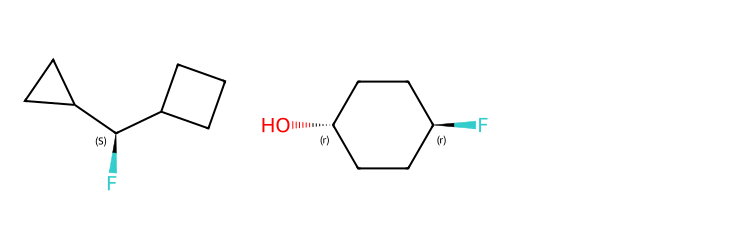

In [35]:
from rdkit.Chem import rdCIPLabeler
rdCIPLabeler.AssignCIPLabels(molecule1)
rdCIPLabeler.AssignCIPLabels(molecule2)
Draw.MolsToGridImage((molecule1, molecule2), subImgSize=(250, 250))

### Black and White Molecules
**Draw a molecule in black and white**

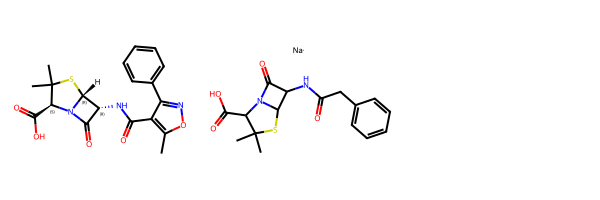

In [36]:
molecules = [Chem.MolFromSmiles(x) for x in ('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12','CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')]
Draw.MolsToGridImage(molecules)

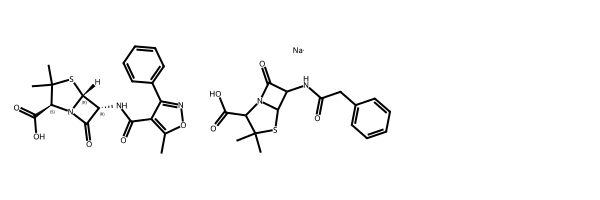

In [37]:
IPythonConsole.drawOptions.useBWAtomPalette()
Draw.MolsToGridImage(molecules)

A second approach uses the rdMolDraw2D package

In [39]:
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image

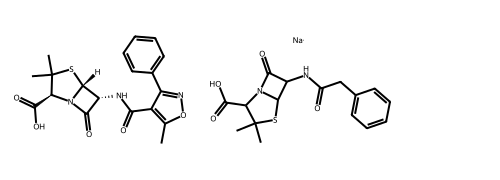

In [40]:
drawer = rdMolDraw2D.MolDraw2DCairo(500, 180, 200, 180)
drawer.drawOptions().useBWAtomPalette()
drawer.DrawMolecules(molecules)
drawer.FinishDrawing()

bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)